## Memory Experiment

The following dataset contain 5 different repetions of the same experiment.

In [1]:
import numpy as np
import pandas as pd

from PyEyeSim import EyeData

In [7]:
import sys
sys.path.append('C:/Users/nickp/Documents/GitHub/PersonalRepo/PyEyeSim/PyEyeSim/')
import hmmanalysis as GHMM

In [6]:
Path = 'C:\\Users\\nickp\\Documents\\Courses\\P1\\EyeMovementDat\\'
FilePath='C:\\Users\\nickp\\Documents\\Courses\\P1\\EyeMovementDat\\MemoryStudyFix.csv'

FixData=pd.read_csv(FilePath)
print(np.shape(FixData))

(41139, 8)


In [3]:
FixData

,Unnamed: 0,subjectID,Stimulus,Category,Repetition,mean_x,mean_y,length
0,0,1,5,7,1,427.388886,553.743713,270
1,1,1,5,7,1,782.835693,379.505615,286
2,2,1,5,7,1,701.805664,303.241455,280
3,3,1,5,7,1,864.697998,416.245056,382
4,4,1,5,7,1,382.930786,622.229553,312
...,...,...,...,...,...,...,...,...
41134,10,45,46,7,5,800.319580,385.262878,286
41135,11,45,46,7,5,1080.494507,296.249237,394
41136,12,45,46,7,5,987.145996,365.118561,226
41137,13,45,46,7,5,699.699402,381.714996,346


In [4]:
MemData=FixData
#Filter for only the first two repetition (Repetition 1 and 2)
MemData1=FixData[(FixData['Repetition']==1) | (FixData['Repetition']==2)]

In [5]:
sizeX,sizeY=1280,960
MemData=EyeData('Memory','Within',MemData,sizeX,sizeY)
MemData.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'7/',StimExt='.png')
MemData.RunDescriptiveFix()

dataset size:  (41139, 8)
study design:  Within
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
column found:  Stimulus  default:  Stimulus
column found:  subjectID  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 45 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images
Data for  45 observers and  12  stimuli.
Mean fixation number:  76.18  +/-  11.77
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  540
Mean X location:  654.7  +/-  28.3  pixels
Mean Y location:  462.5  +/-  33.6  pixels
Mean saccade  amplitude:  254.7  +/-  41.2  pixels
Mean scanpath  length:  19185.5  +/-  4521.8  pixels


(array([ 5, 17, 19, 20, 22, 27, 28, 29, 30, 43, 45, 46], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64))

In [6]:
sizeX,sizeY=1280,960
MemData1=EyeData('Memory','Within',MemData1,sizeX,sizeY)
MemData1.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'7/',StimExt='.png')
MemData1.RunDescriptiveFix()

dataset size:  (17107, 8)
study design:  Within
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
column found:  Stimulus  default:  Stimulus
column found:  subjectID  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 45 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images
Data for  45 observers and  12  stimuli.
Mean fixation number:  31.68  +/-  4.67
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  540
Mean X location:  653.6  +/-  33.1  pixels
Mean Y location:  457.9  +/-  31.5  pixels
Mean saccade  amplitude:  257.1  +/-  35.8  pixels
Mean scanpath  length:  7865.8  +/-  1577.2  pixels


(array([ 5, 17, 19, 20, 22, 27, 28, 29, 30, 43, 45, 46], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64))

In [7]:
components = list(range(2, 16))
components

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

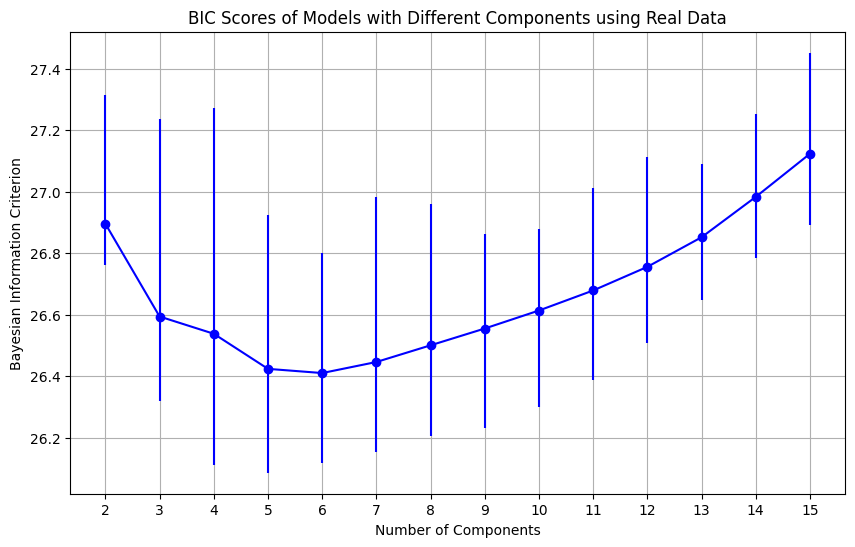

In [8]:
results_1 = GHMM.GaussianHMMPipeline(MemData1, 5, components, starting_tests=100, only_starting=True, only_bic=True)

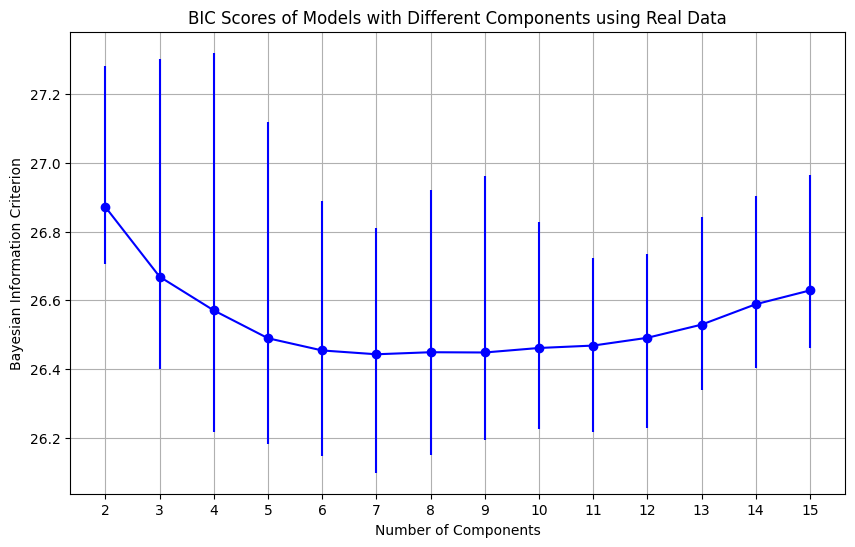

stimns found: [0] 5
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         5      [7, 6, 8, 5, 9]                     [10, 8, 11, 7, 13]   

    Entropy  
0  5.125348  


In [11]:
results_full = GHMM.GaussianHMMPipeline(MemData, 5, components, starting_tests=200, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

We can see that the componets resuting from the stargin test are different, we proceed to analyze both the best models

In [12]:
components = [model.n_components for model in results_full[0]]
print(components)

[7, 8, 10, 11, 13]


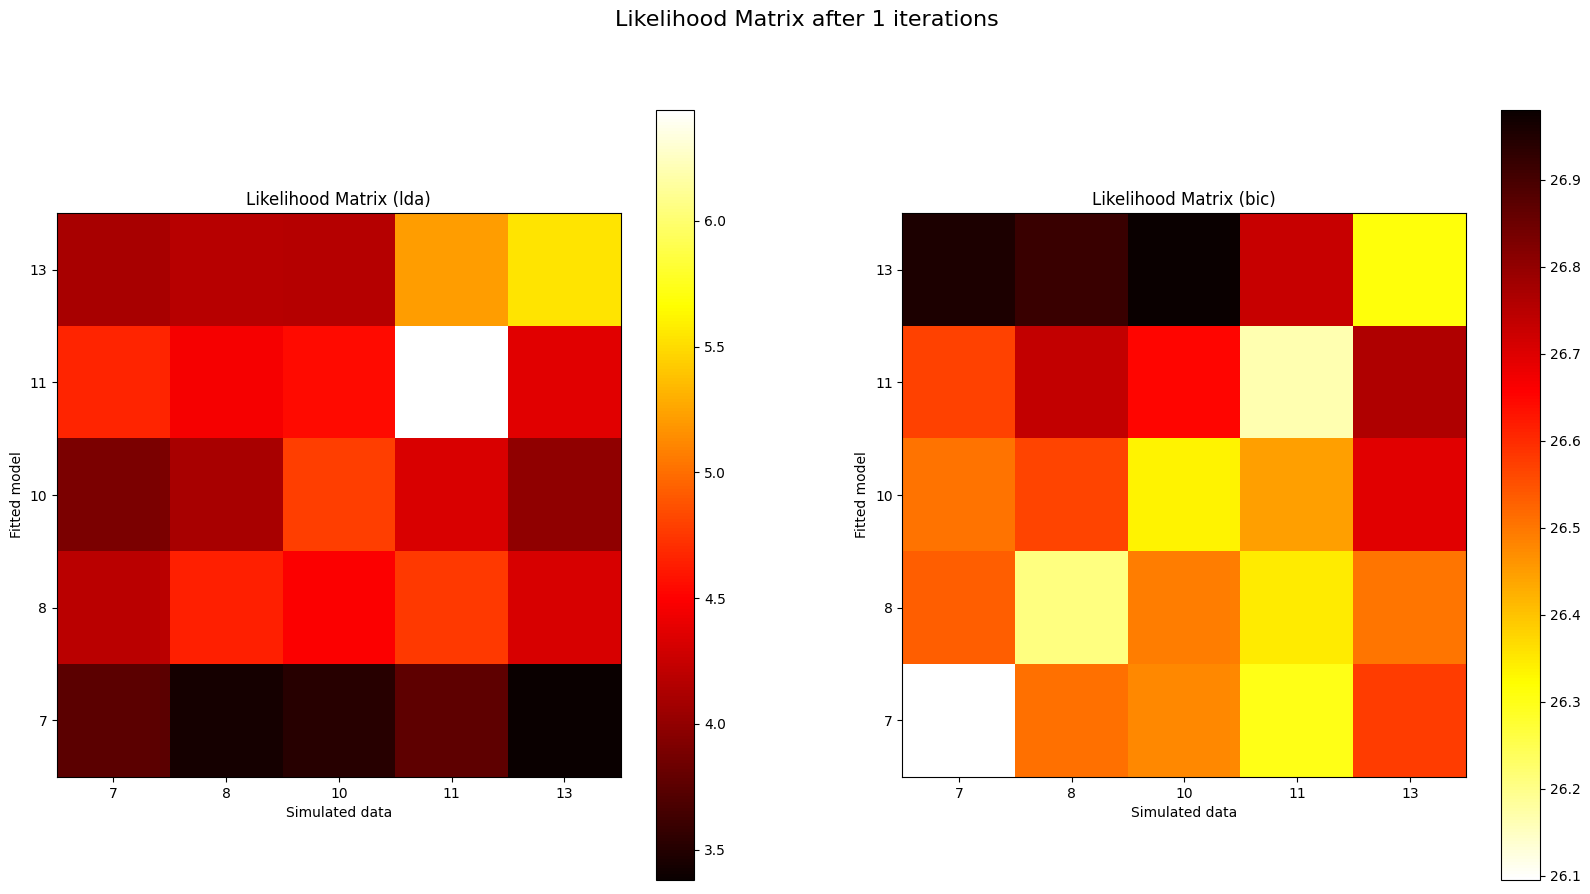

stimns found: [0] 5


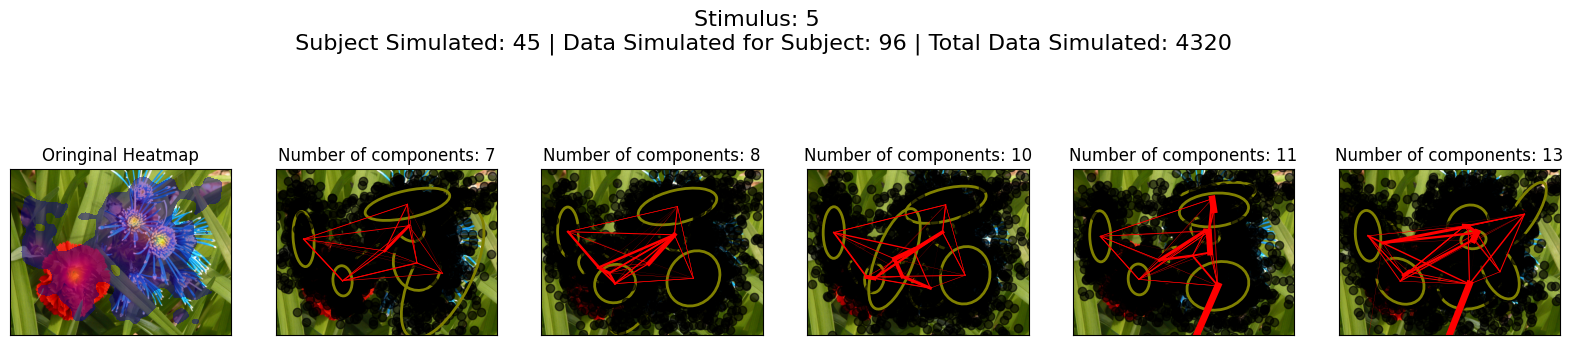

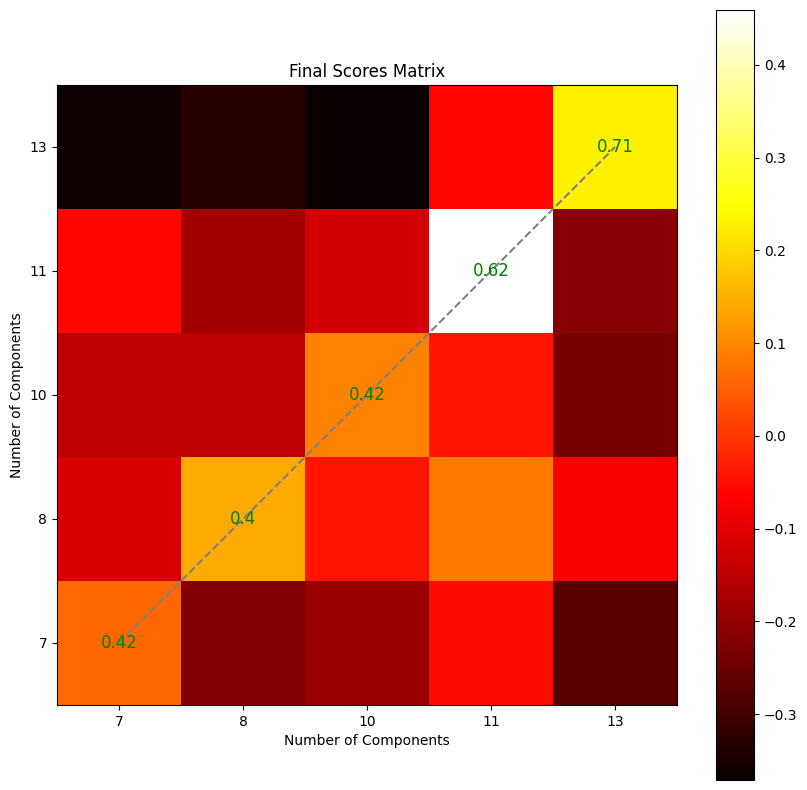

In [13]:
model_list = results_full[0]
GHMM.GaussianHMMPipeline(MemData, 5, components, simulation_type='max', evaluation=['lda','bic'], n_iter=1000, iteration=1, only_bic=True, models=model_list, Summary=False)

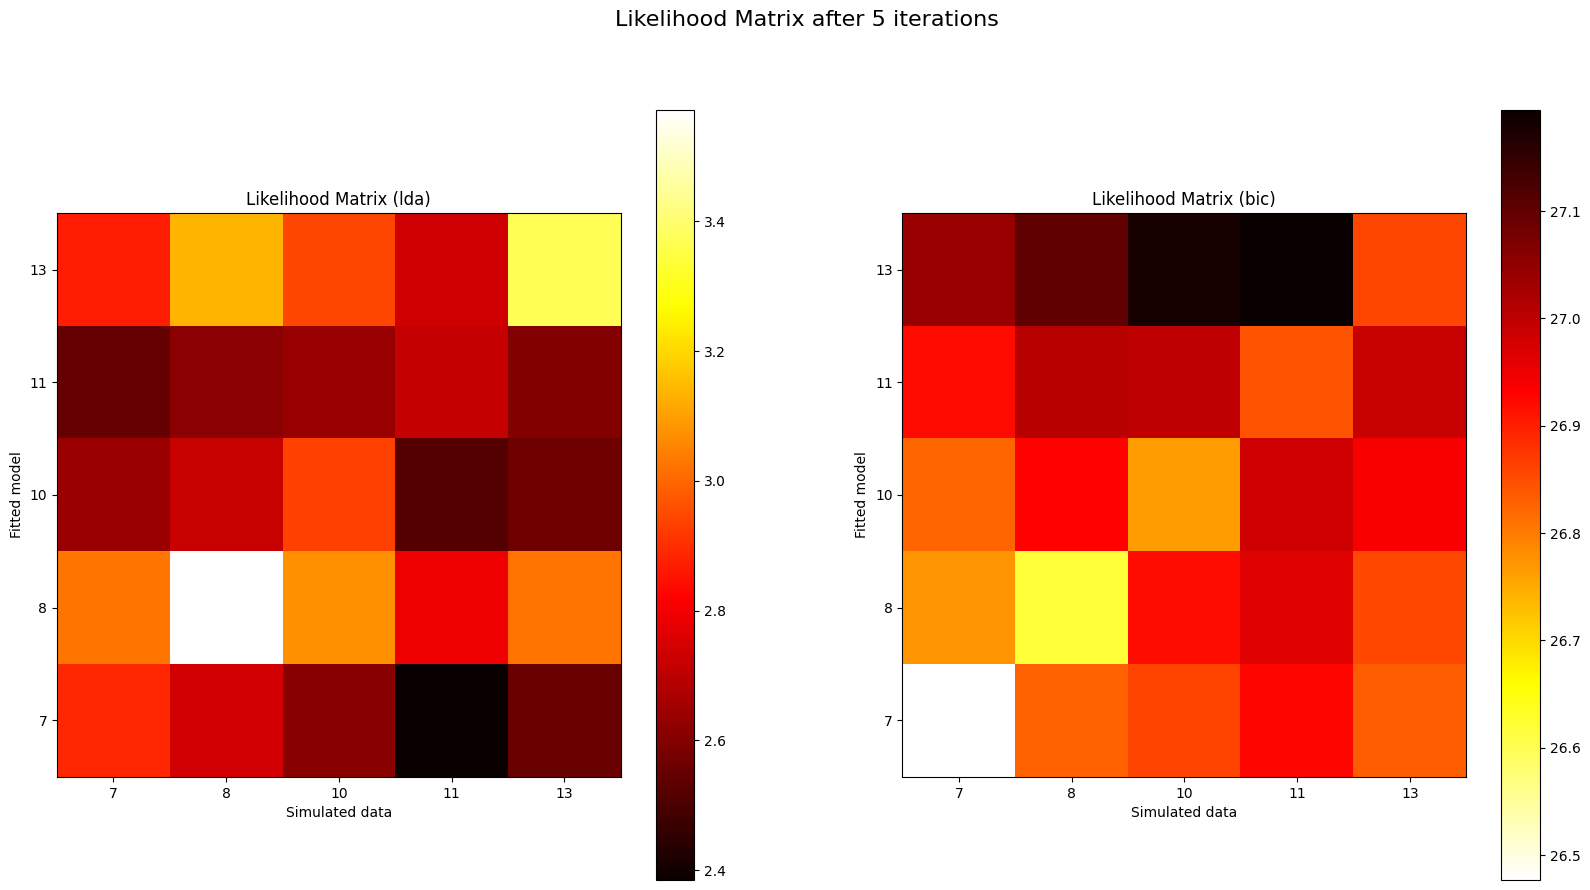

stimns found: [0] 5


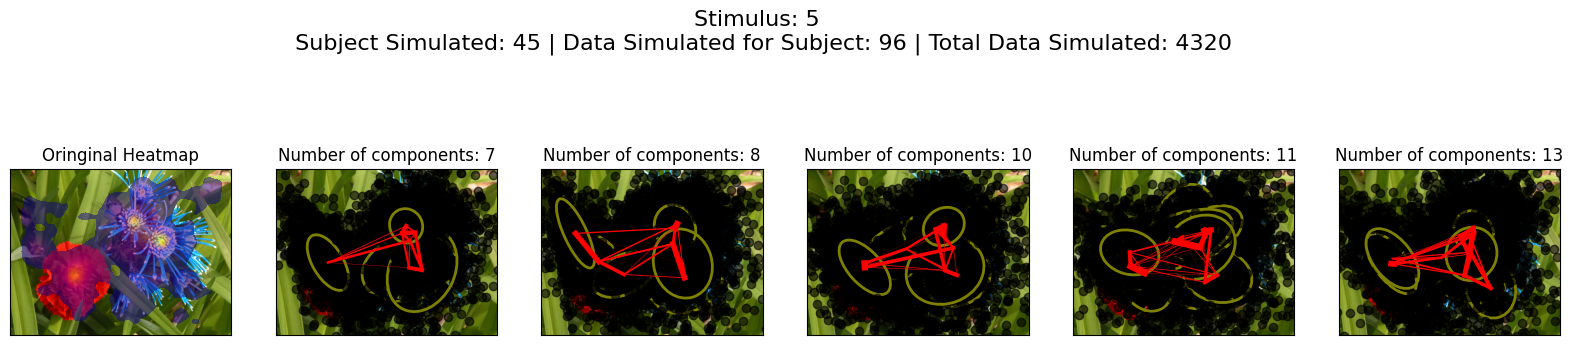

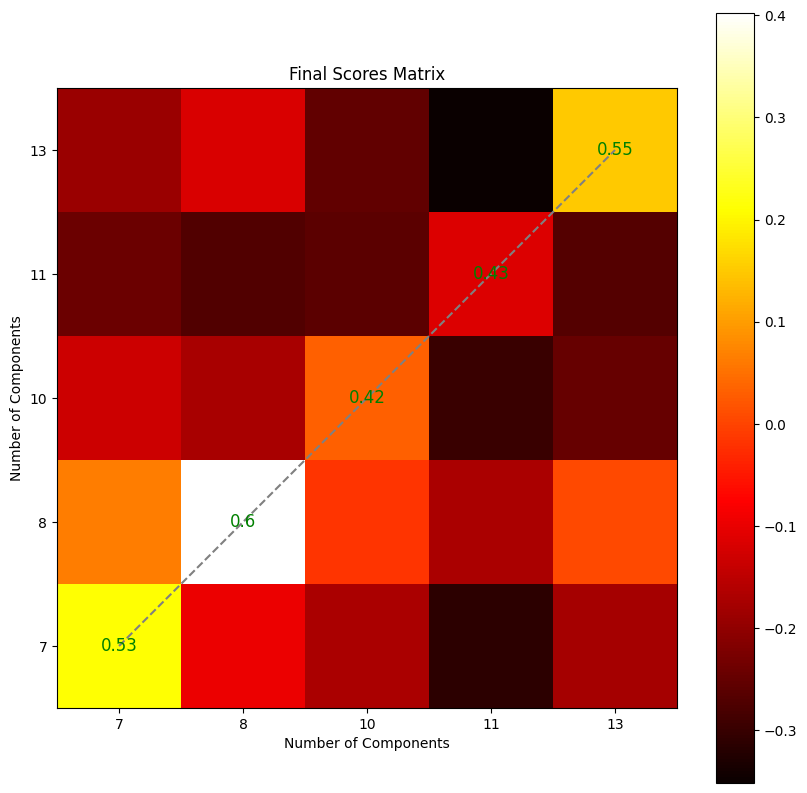

In [14]:
model_list = results_full[0]
GHMM.GaussianHMMPipeline(MemData, 5, components, simulation_type='max', evaluation=['lda','bic'], n_iter=1000, iteration=5, only_bic=True, models=model_list, Summary=False)

Now we make a test using only the first two repetitions, we want to investigate if simulating the same amount of data of the full datasat, we can get similar results.

In [15]:
model_list = []
for model in results_1[0]:
    if model.n_components in components:
        model_list.append(model)

print(model_list)

[GaussianHMM(covariance_type='full', n_components=7), GaussianHMM(covariance_type='full', n_components=8), GaussianHMM(covariance_type='full', n_components=10), GaussianHMM(covariance_type='full', n_components=11), GaussianHMM(covariance_type='full', n_components=13)]


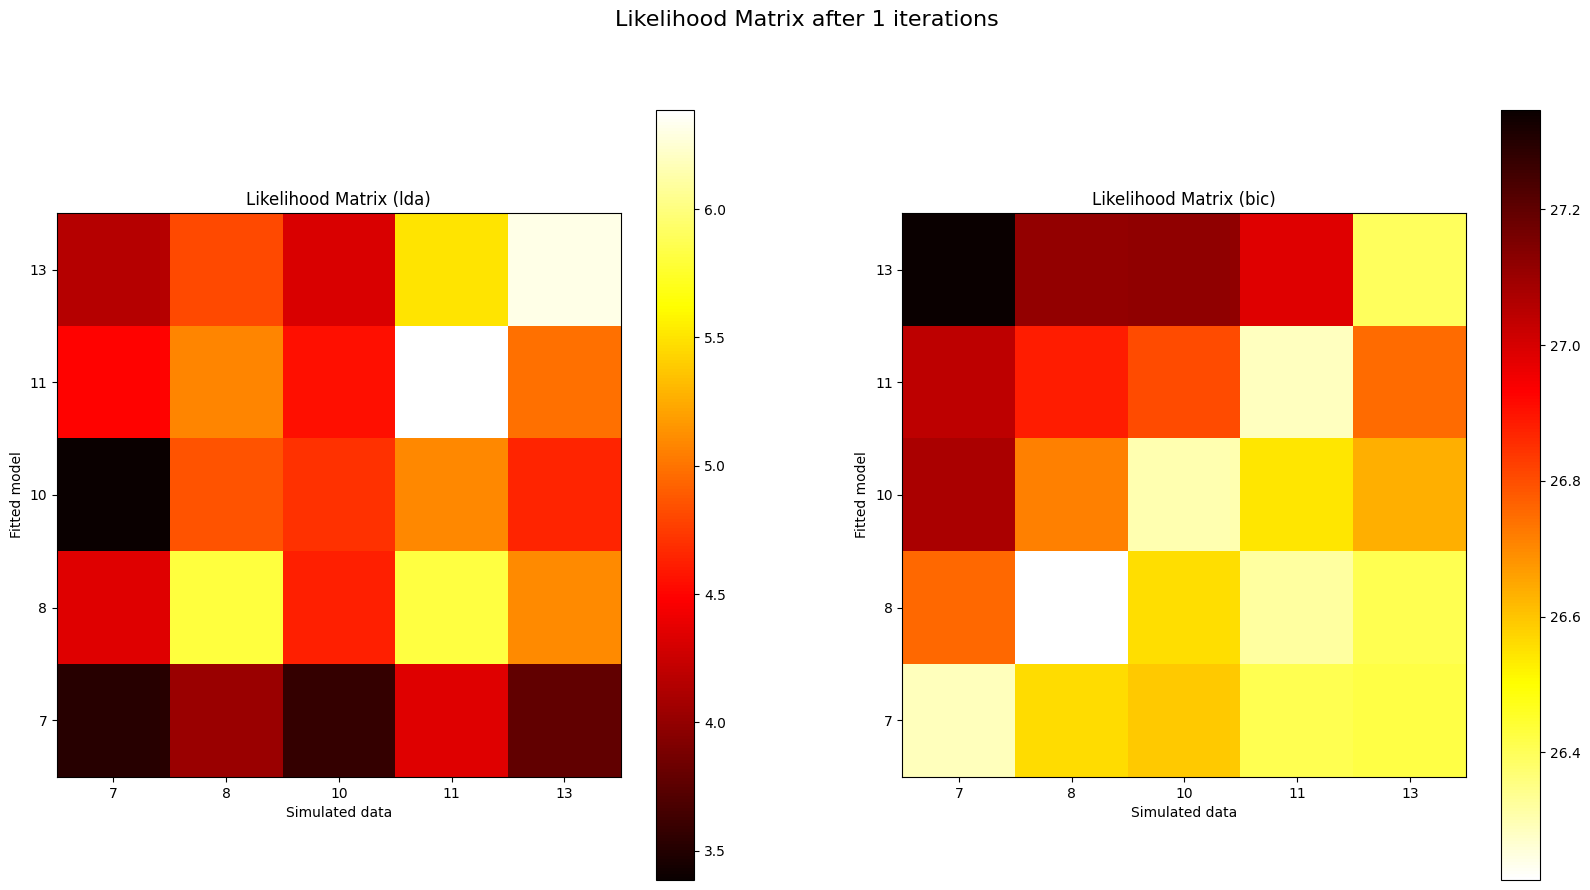

stimns found: [0] 5


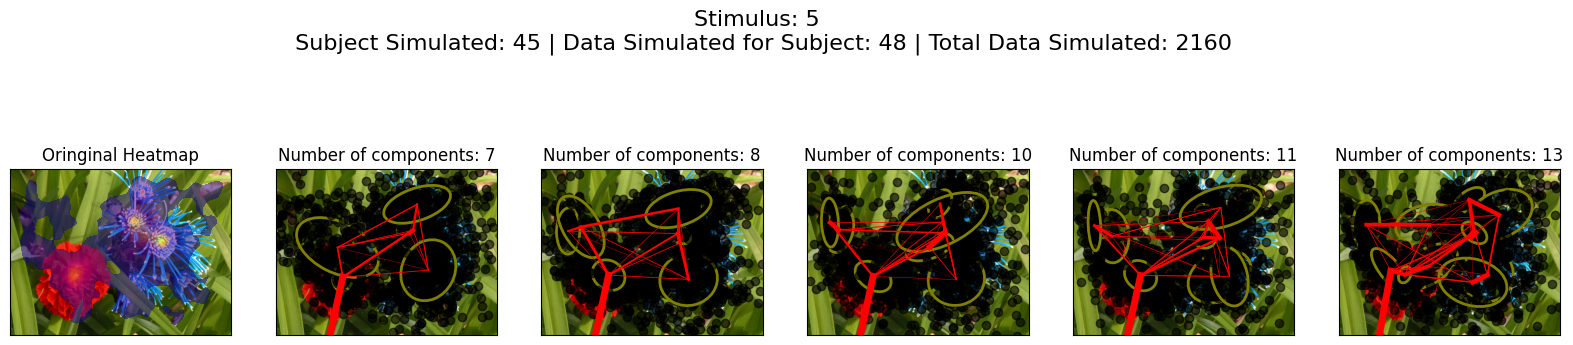

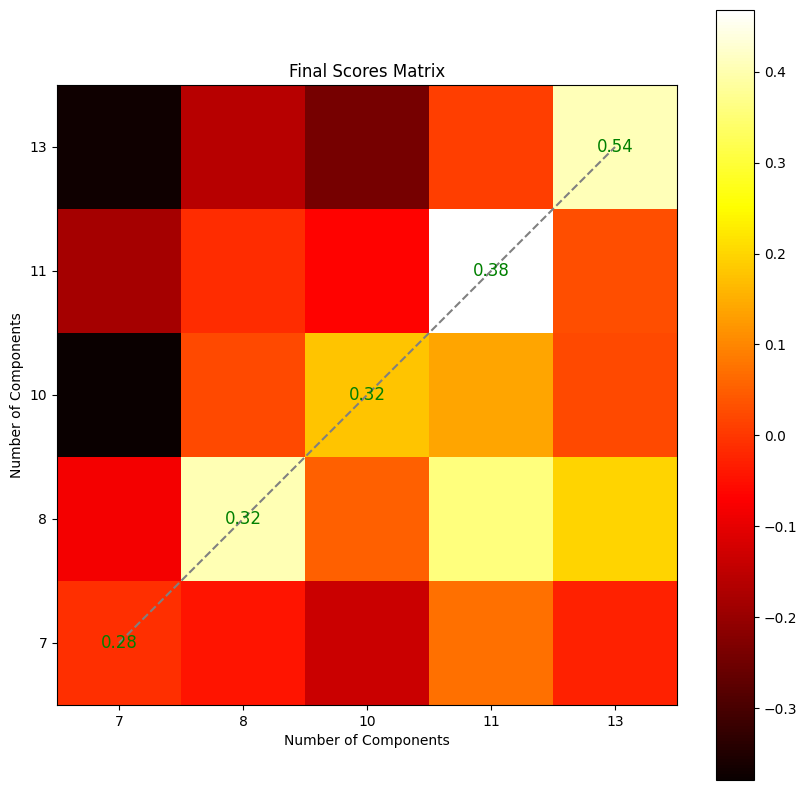

In [16]:
GHMM.GaussianHMMPipeline(MemData1, 5, components, simulation_type='max', evaluation=['lda','bic'], n_iter=1000, iteration=1, only_bic=True, models=model_list, Summary=False)

In [21]:
model_list = []
for model in results_1[0]:
    if model.n_components in components:
        model_list.append(model)

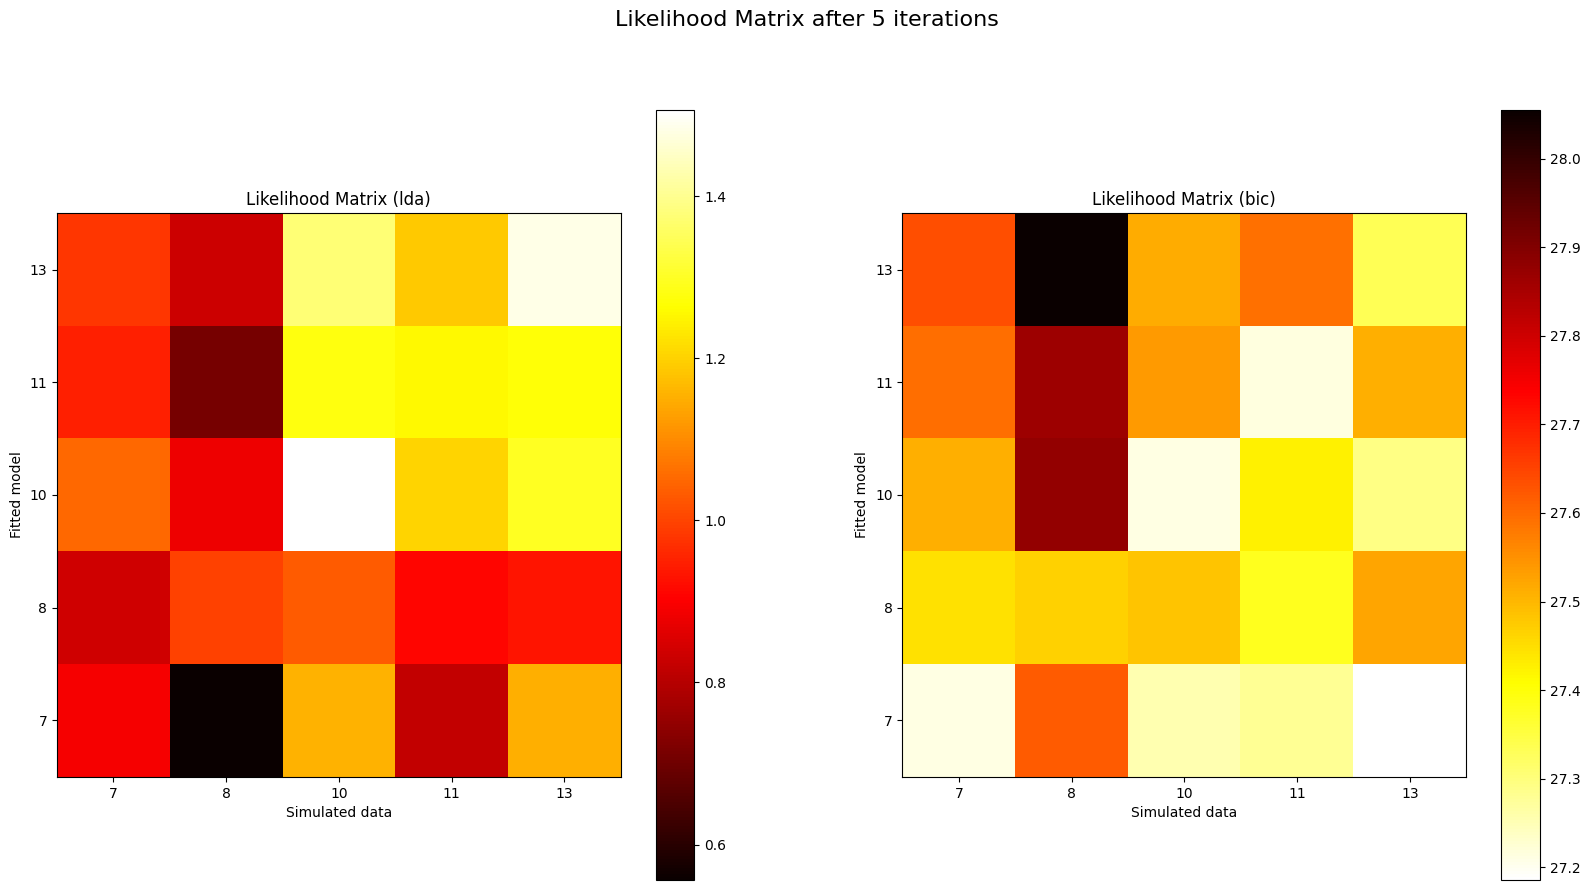

stimns found: [0] 5


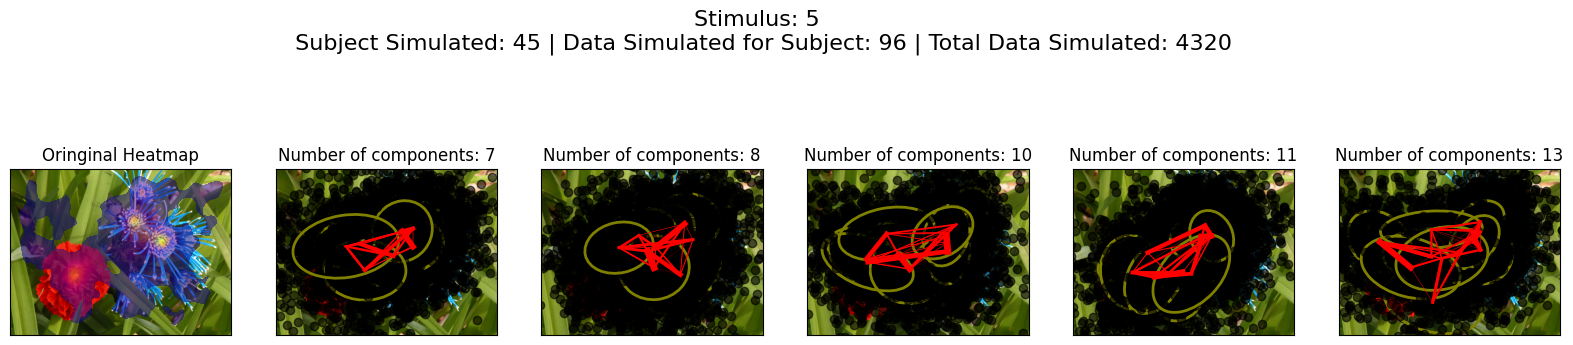

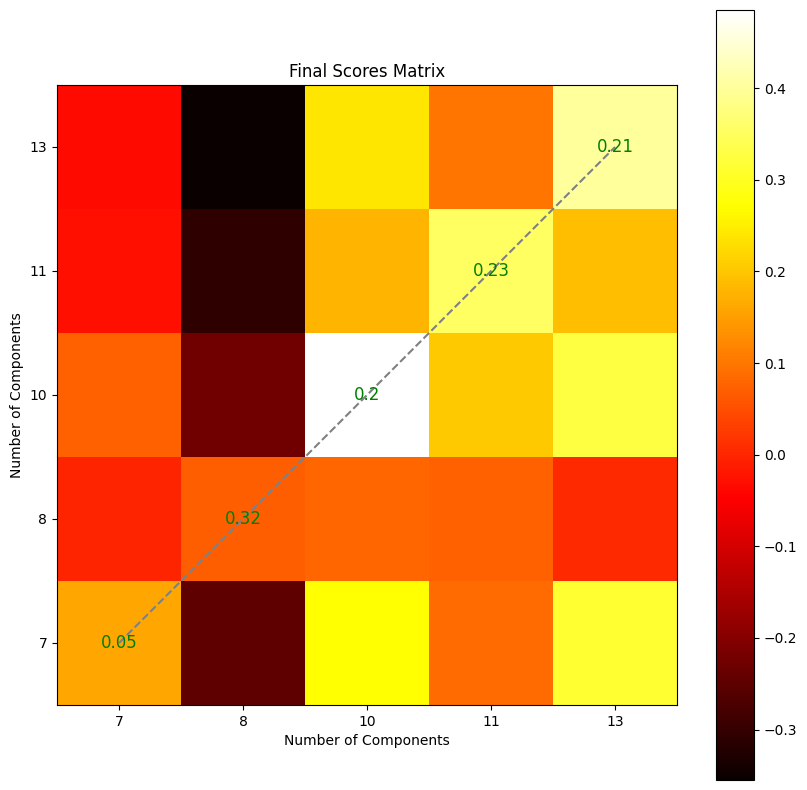

In [22]:
GHMM.GaussianHMMPipeline(MemData1, 5, components, simulation_type=96, subject=45, evaluation=['lda','bic'], n_iter=1000, iteration=5, only_bic=True, models=model_list, Summary=False)

## Tolerance fix

We can see that using the defualt tolerance of 20 we have some problems with one hidden layer that is collocated outside the image, we can fix this by setting a lower tolerance.

Reference: _hmm.py 
    
    ```
        def  DataArrayHmm(self,stim,group=-1,tolerance=20,verb=True):
        ...
    ```

In [39]:
components = list(range(2, 16))
components

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

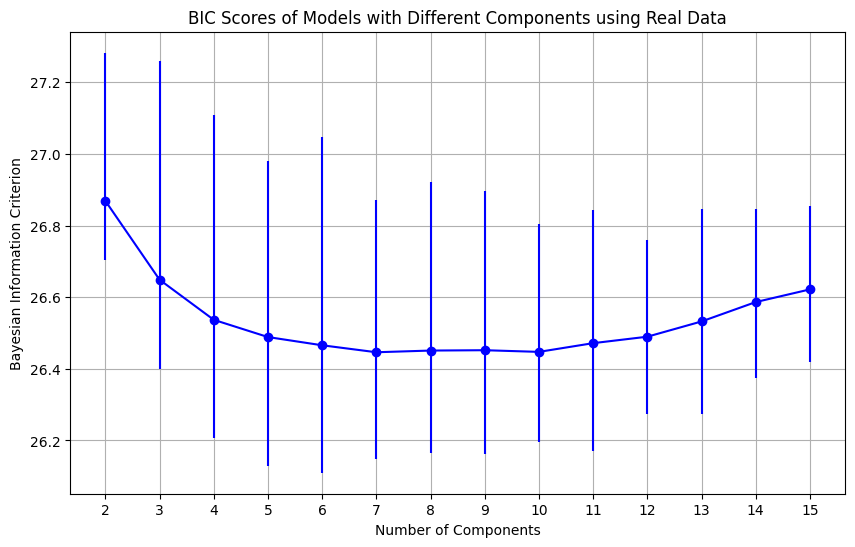

stimns found: [0] 5
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         5      [6, 5, 7, 9, 8]                     [12, 7, 11, 10, 9]   

    Entropy  
0  5.125348  


In [43]:
results_full = GHMM.GaussianHMMPipeline(MemData, 5, components, tollerance=0, starting_tests=200, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

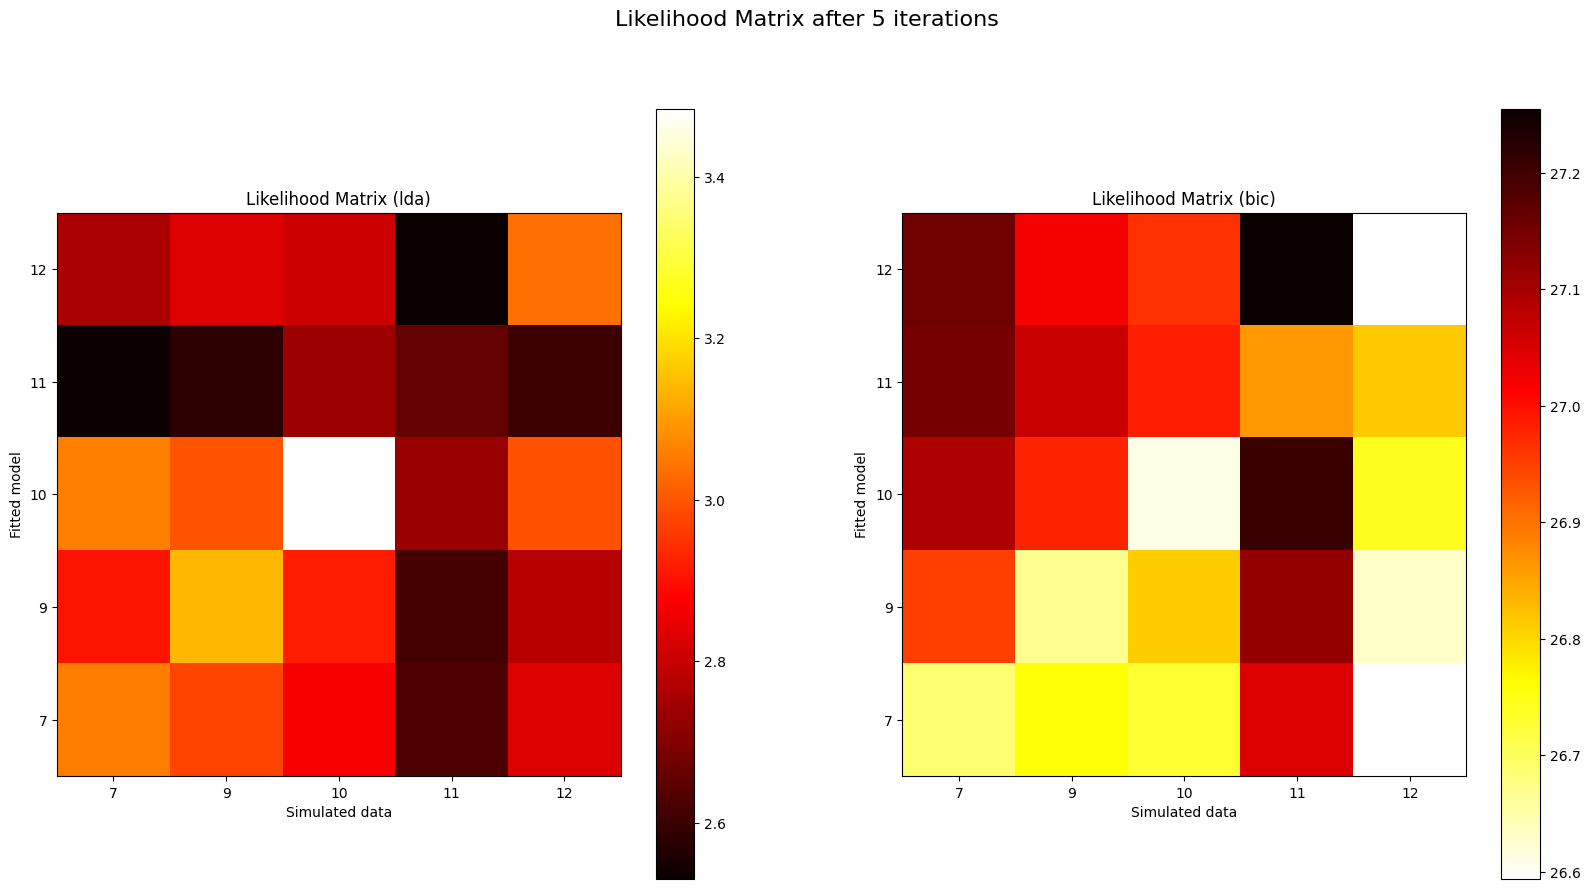

stimns found: [0] 5


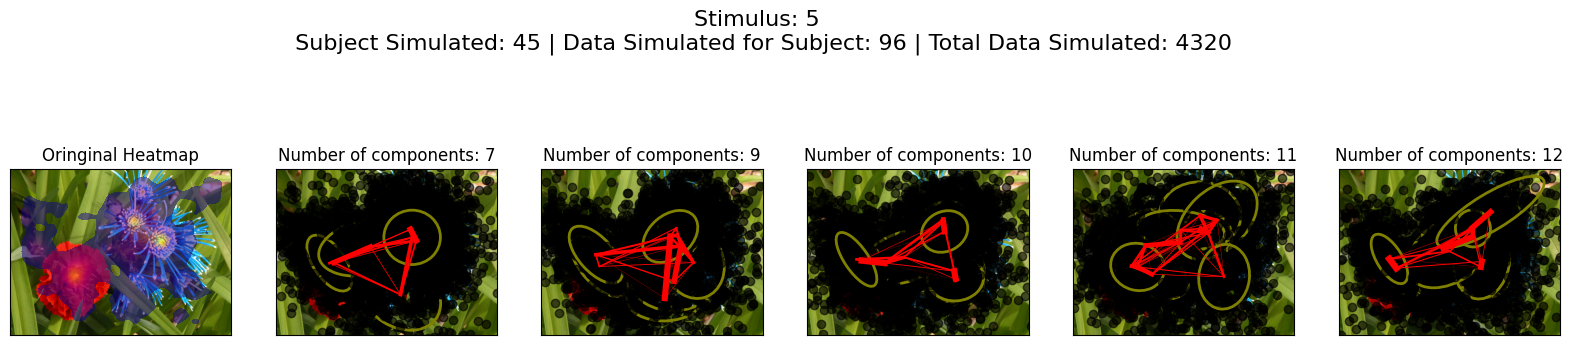

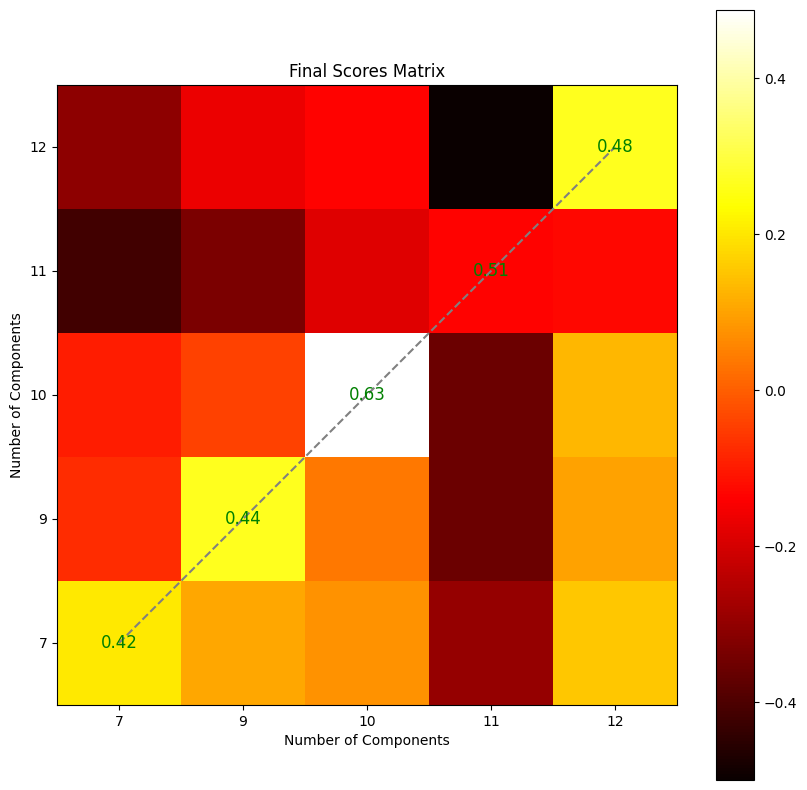

In [44]:
model_list = results_full[0]
GHMM.GaussianHMMPipeline(MemData, 5, components, tollerance=0, simulation_type='max', evaluation=['lda','bic'], n_iter=1000, iteration=5, only_bic=True, models=model_list, Summary=False)

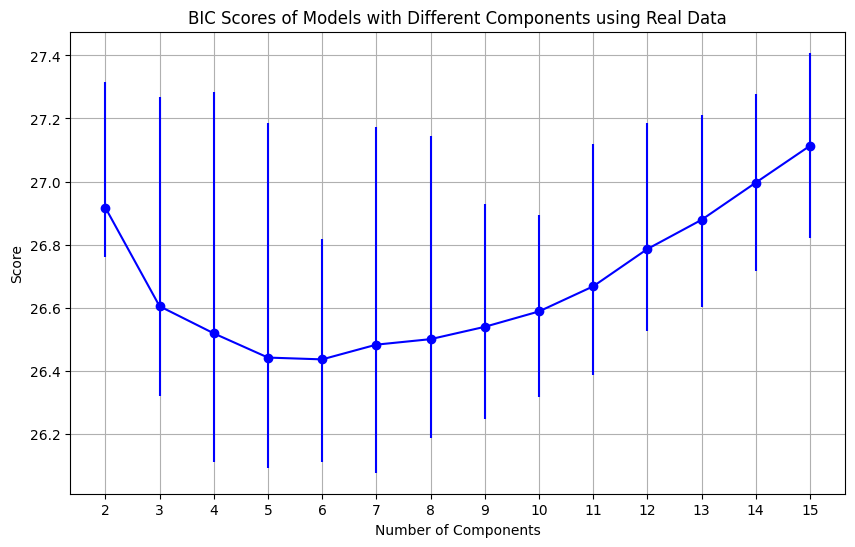

stimns found: [0] 5
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         5      [7, 5, 6, 4, 8]                       [6, 9, 10, 5, 8]   

    Entropy  
0  4.908556  


In [13]:
results = GHMM.GaussianHMMPipeline(MemData1, 5, components, tollerance=0, starting_tests=100, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

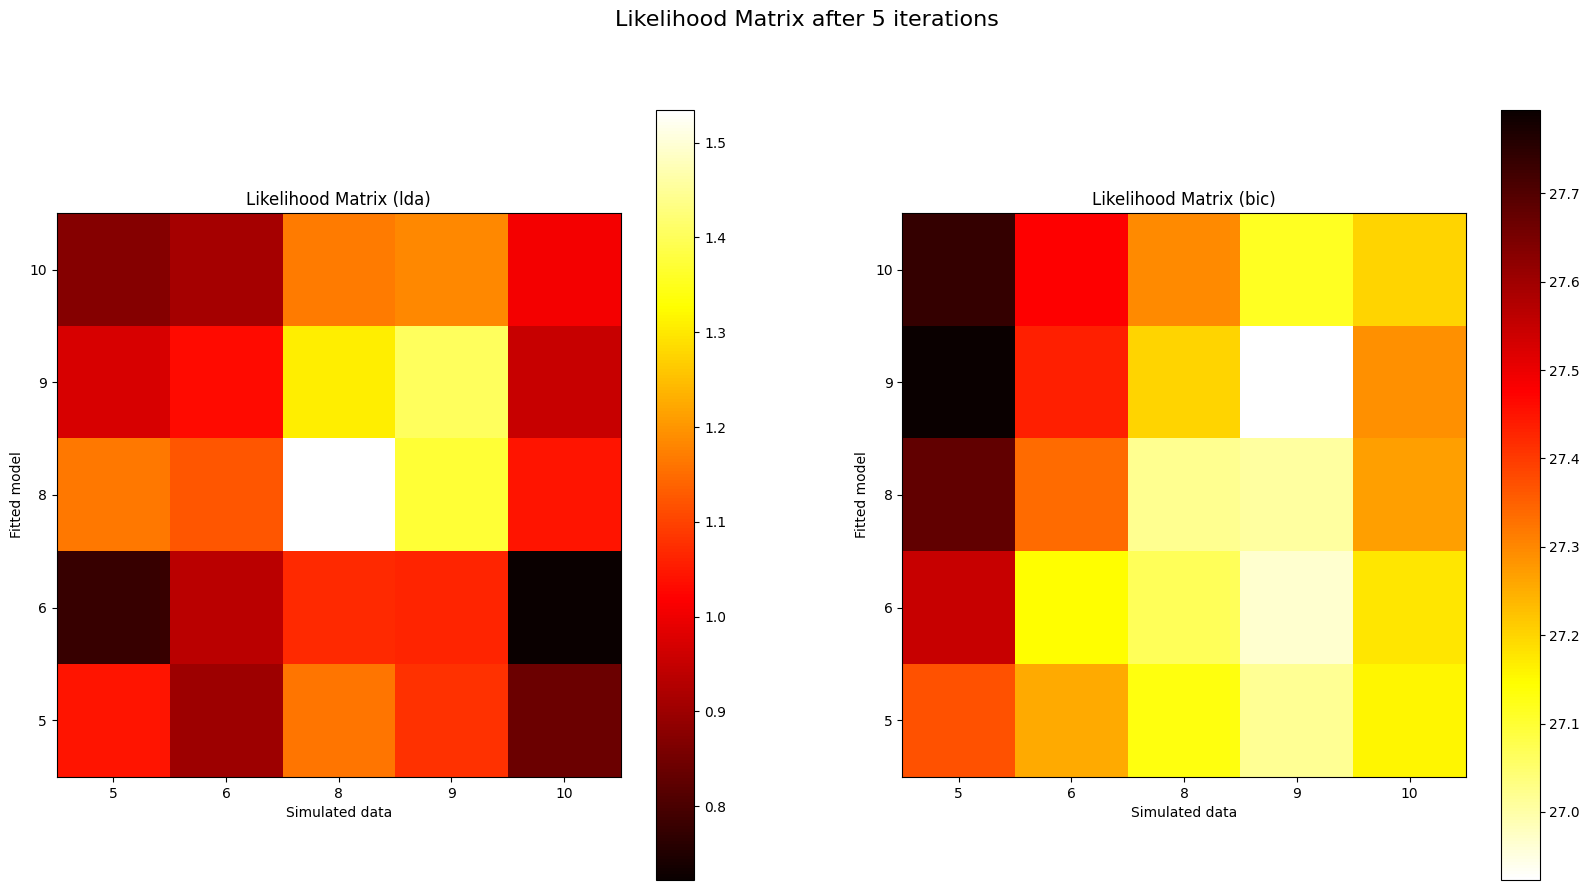

stimns found: [0] 5


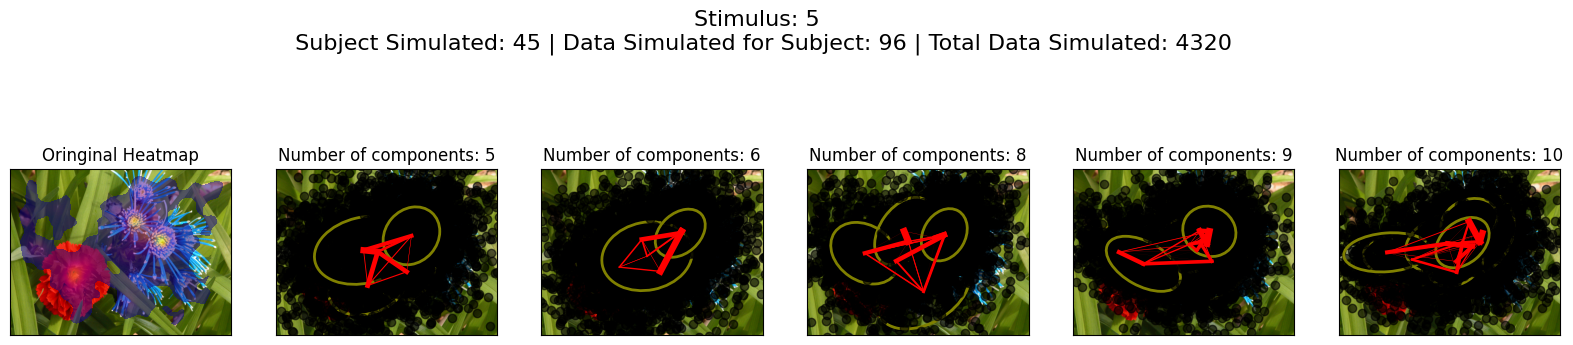

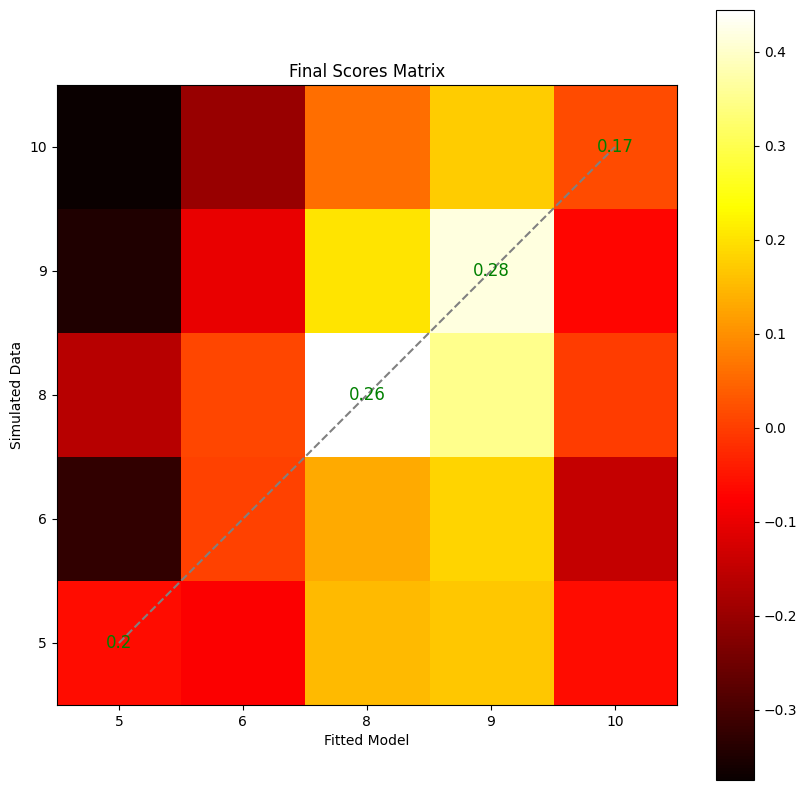

In [19]:
model_list = results[0]
GHMM.GaussianHMMPipeline(MemData1, 5, components, tollerance=0, simulation_type=96, subject=45, evaluation=['lda','bic'], iteration=5, only_bic=True, models=model_list, Summary=False)